# Ismael Hasan
## Project 3

**IS 362 - Dr. Charles Pak - CUNY School of Professional Studies**

Your assignment involves combining information from a number of SQL tables, then displaying the information in a pandas DataFrame.<br>

For your relational database management system, you may use any RDBMS,including MySQL, PostgreSQL, sqlite, or any of the other RDMBSs supported by the database in Step 1 below. <br>

> 1. For your database, you should download and install the appropriate version of the Chinook database for your RDBMS, which is available here, under the downloads tab: https://chinookdatabase.codeplex.com/
> 2. Your task is to create a pandas DataFrame that displays Customers’ Last Name and First Name, and each customer’s purchased Track names and Album Titles. The information should be sorted by Customer LastName then Customer FirstName. The first five rows of your results should look like this:

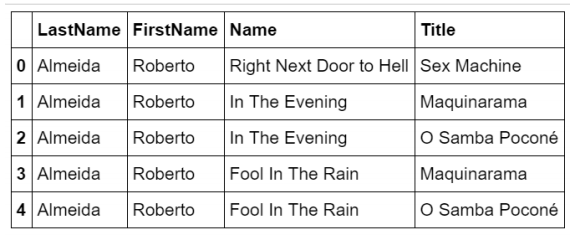

Data Source: __[Chinook_sqlite.sqlite](https://github.com/lerocha/chinook-database/blob/master/ChinookDatabase/DataSources/Chinook_Sqlite.sqlite)__

In [29]:
import mysql.connector as sql
import pandas as pd

***Connect to the Chinook sqlite database loaded into local MySQL Server***

In [30]:
connection = sql.connect(host = '127.0.0.1', database = 'chinook_sqlite', user = 'root', password = 'cunysps')

***SQL query for customers’ Last Name, First Name, purchased Track names and Album Titles***

In [31]:
sql = ("SELECT \
                customer.LastName AS 'Last Name', \
                customer.FirstName AS 'First Name', \
                track.Name AS 'Song', \
                album.Title AS 'Album' \
                FROM customer \
                JOIN invoice \
                    ON customer.CustomerId = invoice.CustomerId \
                JOIN invoiceline \
                    ON invoice.InvoiceId = invoiceline.InvoiceId \
                JOIN track \
                    ON invoiceline.TrackId = track.TrackId \
                JOIN Album \
                    ON track.AlbumId = Album.AlbumId \
                ORDER BY customer.LastName, album.Title ASC, track.name ASC")

***Read the SQL query into a dataframe***<br>
***Display first 5 rows***

In [32]:
music = pd.read_sql(sql, connection)
music.head(5)

,Last Name,First Name,Song,Album
0,Hansen,Bjørn,Breaking The Rules,For Those About To Rock We Salute You
1,Hansen,Bjørn,Evil Walks,For Those About To Rock We Salute You
2,Hansen,Bjørn,Inject The Venom,For Those About To Rock We Salute You
3,Hansen,Bjørn,Put The Finger On You,For Those About To Rock We Salute You
4,Köhler,Leonie,Balls to the Wall,Balls to the Wall
